In [2]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
# Read in the data
df = pd.read_csv(r"C:\Users\Yusuf\OneDrive\Desktop\Python Project1\movies.csv\movies.csv")

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Check for missing data
missing_data = df.isnull()  

# Count the number of missing values in each column
missing_count = missing_data.sum()

print(missing_count)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


<Axes: >

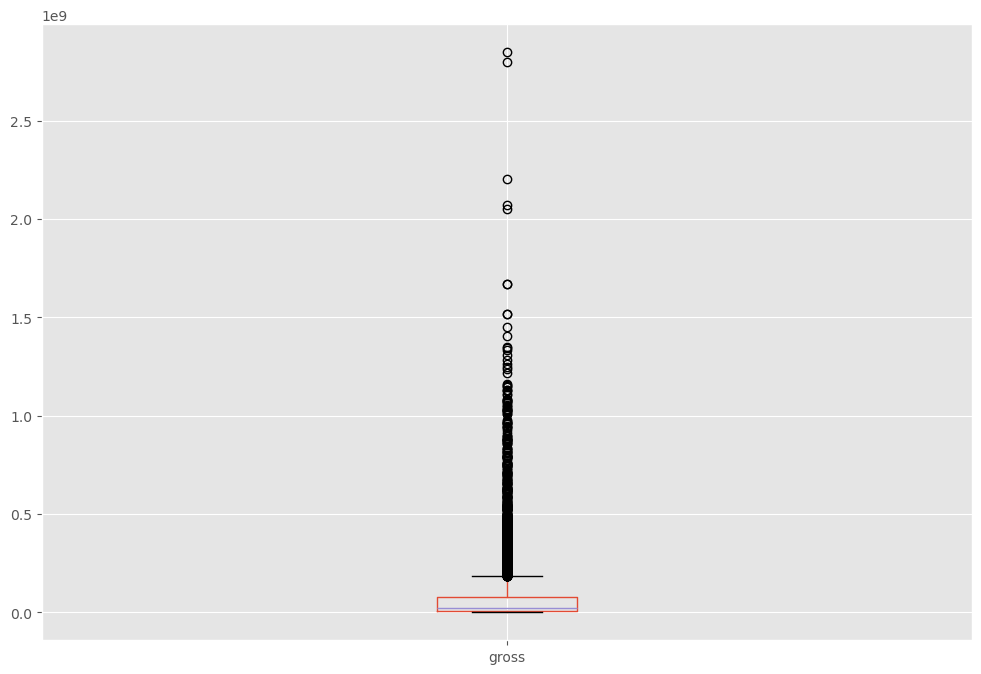

In [6]:
# Are there any Outliers?

df.boxplot(column=['gross']) #Boxplot helps in finding outliers

In [7]:
# Data Types for each columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Change data type from float64 to int64
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

In [9]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In this dataframe the year and the released doesnt match with each other so we need to take care of that

In [11]:
df['released'] = df['released'].astype(str)

# Print the first few entries to verify the content
print(df['released'].head())

# Extract the year using a regular expression
df['released_year'] = df['released'].str.extract(r'(\d{4})')

5445    December 18, 2009 (United States)
7445       April 26, 2019 (United States)
3045    December 19, 1997 (United States)
6663    December 18, 2015 (United States)
7244       April 27, 2018 (United States)
Name: released, dtype: object


In [12]:
df['released_year'].head()

5445    2009
7445    2019
3045    1997
6663    2015
7244    2018
Name: released_year, dtype: object

In [23]:
#drop duplucates if any
#df.drop_duplicates()

It just my hypothesis based on looking at the dataset I'm thnking the budget and gross have the higher correlation

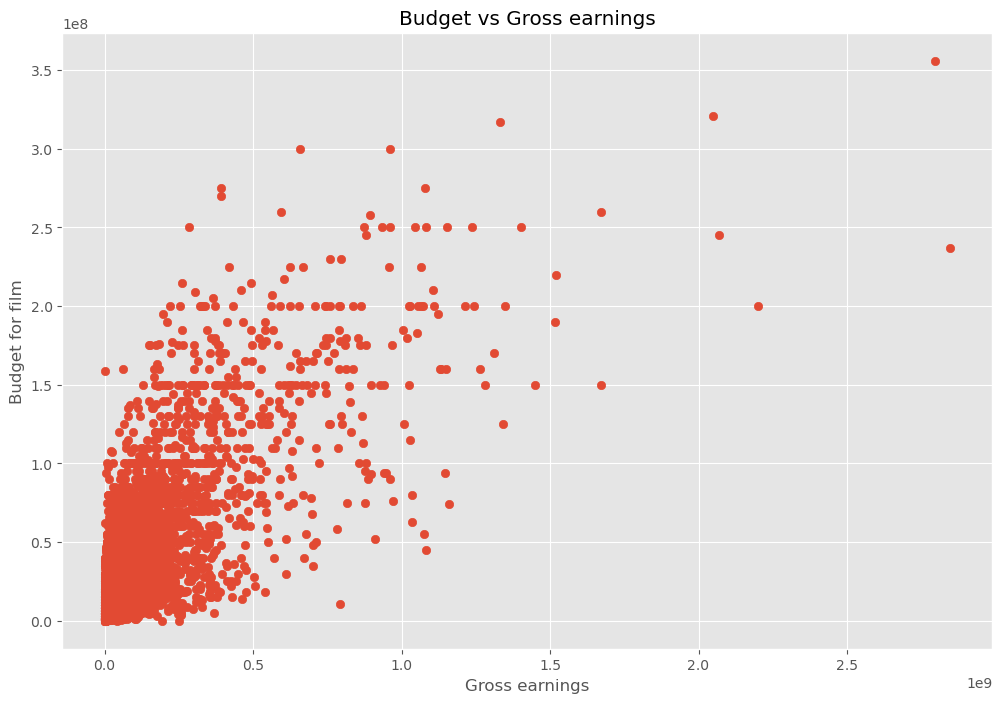

In [26]:
#Scatter plot with budget vs gross
plt.scatter(x= df['gross'], y= df['budget'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget for film')
plt.show()

In [27]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


<Axes: xlabel='gross', ylabel='budget'>

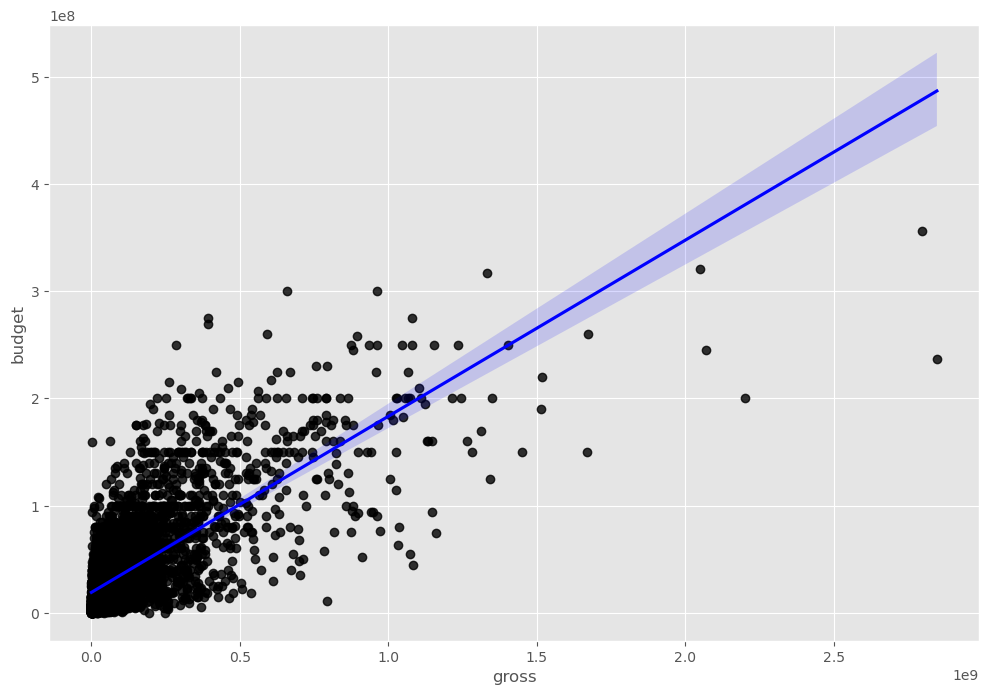

In [28]:
#Plot the budget vs gross using seaborn 
sns.regplot(x="gross", y="budget", data=df, scatter_kws = {'color':'black'}, line_kws = {'color':'blue'})

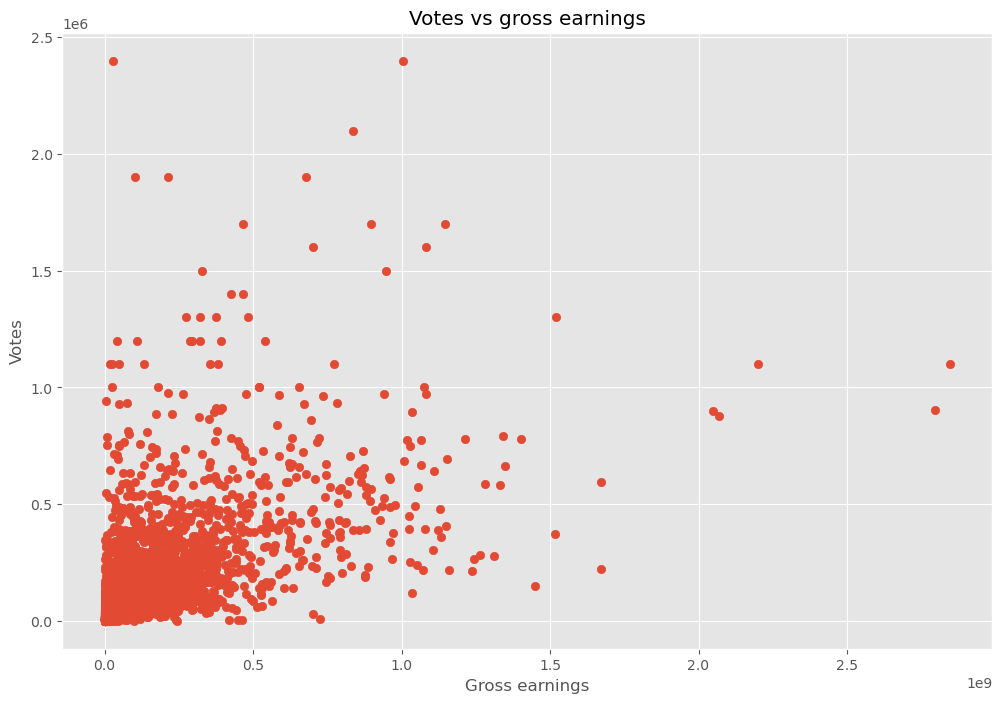

In [31]:
#Scatter plot with votes and gross
plt.scatter(x= df['gross'], y= df['votes'])
plt.title('Votes vs gross earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Votes')
plt.show()

<Axes: xlabel='gross', ylabel='votes'>

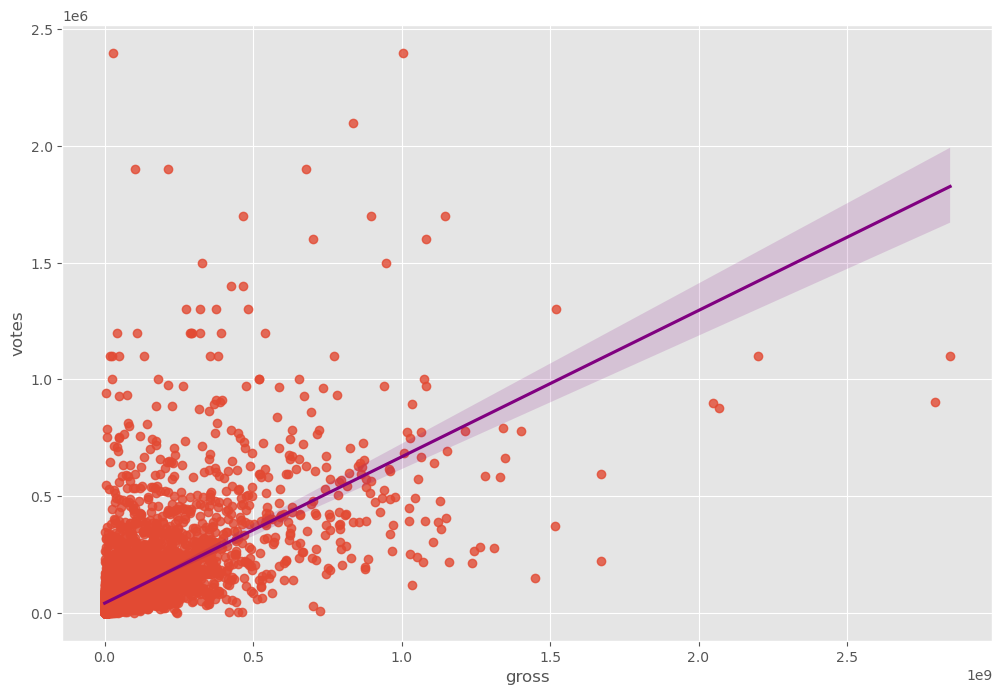

In [32]:
#Plot the budget vs gross using seaborn 
sns.regplot(x="gross", y="votes", data=df, line_kws = {'color':'purple'})


In [33]:
# lets find the correlation 
df.corr(method = 'pearson', numeric_only=True) #df.corr() works only for numeric values


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


Based on my hypothesis from the df.corr() the budget and gross have high correlation

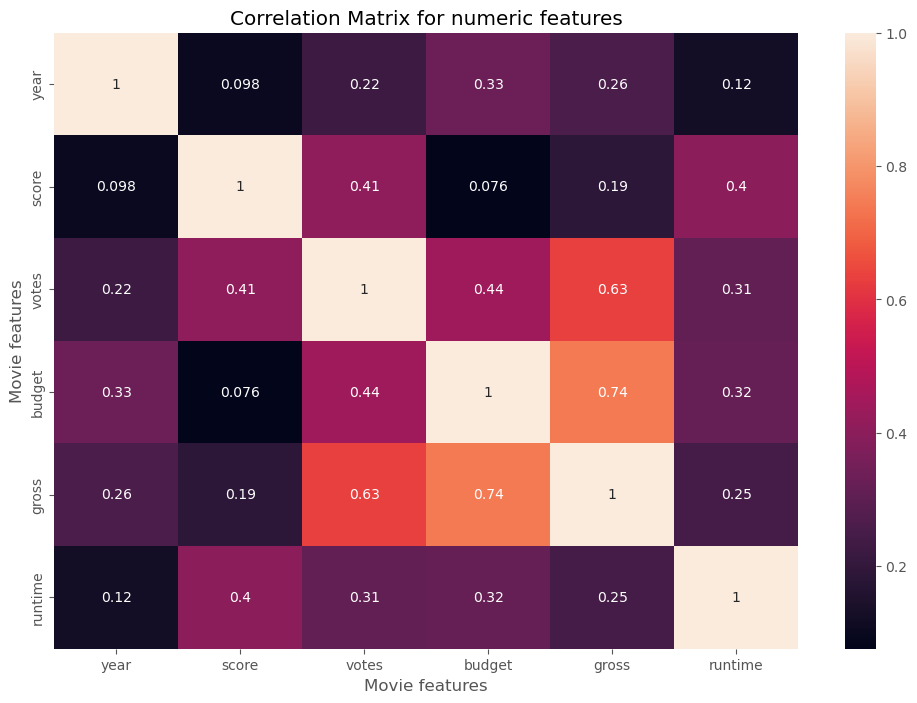

In [35]:
#Plotting correlations using heatmap
correlation_matrix = df.corr(method = 'pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [36]:
# Let's look at Company 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


We have to numerize all the column not just the company to find the correlation between them

In [38]:
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


In [39]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


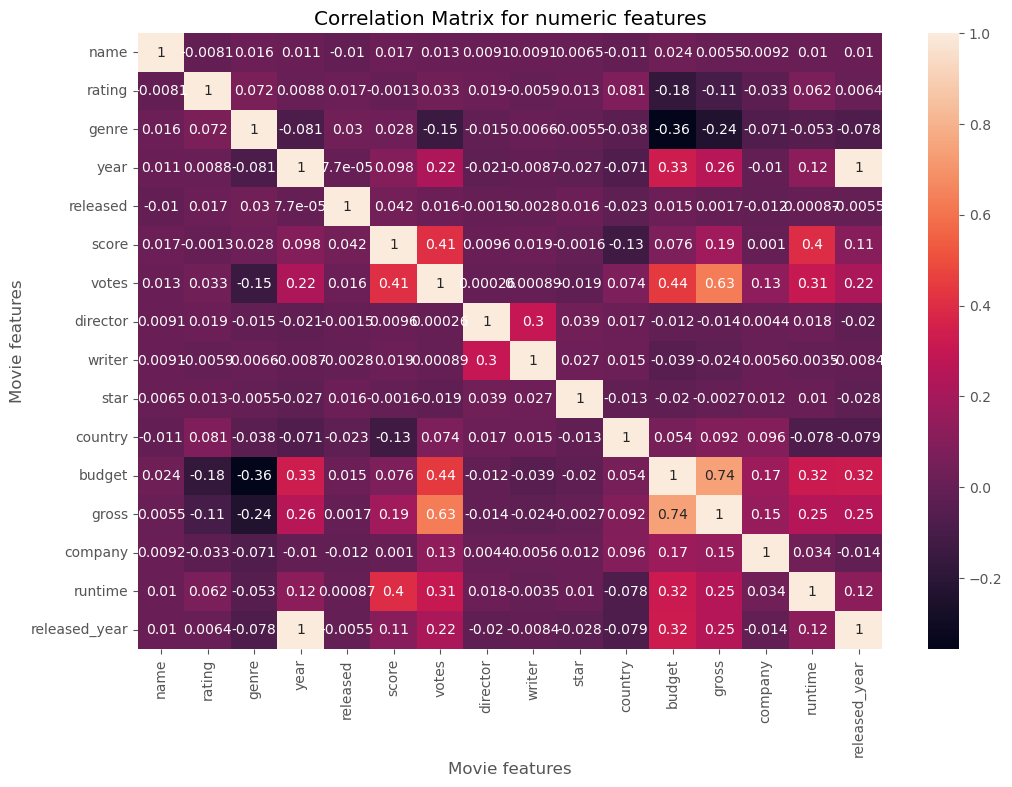

In [41]:
#Plotting correlations with all numeric values 
correlation_matrix = df.corr(method = 'pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

Now as we tell the correlation matrix heatmap is larger compared to pervious one because we converted all the columns to numeric

In [44]:
# Set the display option to show more rows
pd.set_option('display.max_rows', None)

#correlation matrix and pairs
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

# Print the full output
corr_pairs.head(20)

name    name             1.000000
        rating          -0.008069
        genre            0.016355
        year             0.011453
        released        -0.010480
        score            0.017097
        votes            0.013088
        director         0.009079
        writer           0.009081
        star             0.006472
        country         -0.010737
        budget           0.023970
        gross            0.005533
        company          0.009211
        runtime          0.010392
        released_year    0.010225
rating  name            -0.008069
        rating           1.000000
        genre            0.072423
        year             0.008779
dtype: float64

In [45]:
# sort values in sorted pairs 
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head(20)

genre          budget          -0.356564
budget         genre           -0.356564
genre          gross           -0.235650
gross          genre           -0.235650
rating         budget          -0.176002
budget         rating          -0.176002
votes          genre           -0.145307
genre          votes           -0.145307
score          country         -0.133348
country        score           -0.133348
gross          rating          -0.107339
rating         gross           -0.107339
year           genre           -0.081261
genre          year            -0.081261
released_year  country         -0.079009
country        released_year   -0.079009
               runtime         -0.078412
runtime        country         -0.078412
genre          released_year   -0.078210
released_year  genre           -0.078210
dtype: float64

In [46]:
# identify high correlation
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes          gross            0.630757
gross          votes            0.630757
               budget           0.740395
budget         gross            0.740395
released_year  year             0.996397
year           released_year    0.996397
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
dtype: float64

Votes and the budget have the highest correlation to gross earnings